# Exercise Twelve: Texts, Three Ways
For this week, you will sample the three methods we've explored (topic modeling, sentiment analysis, and Markov chain generation) using the same set of root texts.

- Collect and import ten documents (novels work best, but anything goes!)
- Using the topic modeling code as a starter, build a topic model of the documents
- Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare
- Using the Markov chain code as a starter, generate a sentence using one of the documents
- Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

As a bonus, try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

(Karsdorp, Kestemont, and Riddell).


## Stage One: Collect and import ten documents (novels work best, but anything goes!)

(Karsdorp, Kestemont, and Riddell).

In [1]:
import wikipedia
import os
path = "entries/"

directors = ["Steven Spielberg", "George Lucas", "Martin Scorsese", "Ridley Scott","M. Night Shyamalan"]
for director in directors:
    page = wikipedia.page(director)
    print(page.title)
    filename = path + director.replace(" ","_") + ".txt"
    with open (filename, "w", encoding="utf-8", errors="ignore") as f:
        f.write(page.content)
        f.close()

In [2]:
authors = ["Terry Pratchett", "Annalee Newitz", "Charlie Jane Anders", "Octavia Butler","N.K. Jemisin"]
for author in authors:
    page = wikipedia.page(author)
    print(page.title)
    filename = path + author.replace(" ","_") + ".txt"
    with open (filename, "w", encoding="utf-8", errors="ignore") as f:
        f.write(page.content)
        f.close()

Terry Pratchett
Annalee Newitz
Charlie Jane Anders
Octavia E. Butler
N. K. Jemisin


## Stage Two: Using the topic modeling code as a starter, build a topic model of the documents

(Karsdorp, Kestemont, and Riddell).

In [3]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'entries/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:10]) # print names of 1st ten files in corpus

5
['entries/Annalee_Newitz.txt', 'entries/Charlie_Jane_Anders.txt', 'entries/N.K._Jemisin.txt', 'entries/Octavia_Butler.txt', 'entries/Terry_Pratchett.txt']


In [4]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

In [5]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (5, 3816). Number of tokens 10829


In [6]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)  

In [7]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

               000  0062204707  0252061400       036  0385535922  0393652673  \
Topic 0   0.237512    0.192002    0.193637  0.183515    0.239989    0.189205   
Topic 1   0.182044    0.186931    0.218154  0.203321    0.200888    0.236871   
Topic 2   0.230794    0.183528    0.187421  0.209025    0.225981    0.209132   
Topic 3   0.193726    0.183659    0.239633  0.177718    0.213248    0.167845   
Topic 4   0.171937    0.209294    0.169161  0.183349    0.240766    0.224978   
...            ...         ...         ...       ...         ...         ...   
Topic 95  0.195933    0.176922    0.186421  0.214385    0.210433    0.182803   
Topic 96  0.177625    0.305710    0.208264  0.215818    0.261899    0.227169   
Topic 97  0.190603    0.219492    0.205970  0.208407    0.196207    0.223520   
Topic 98  0.183702    0.195269    0.176142  0.190611    0.172816    0.188587   
Topic 99  0.199785    0.231579    0.176850  0.220537    0.221286    0.166682   

          0431906335  0814757925  08223

In [8]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

butler        0.289018
page          0.285791
links         0.285770
lost          0.281942
midnight      0.279050
damaged       0.278095
largely       0.276414
states        0.273385
alongside     0.269077
hallmark      0.268642
sensuous      0.267941
fledgling     0.264128
58            0.264099
los           0.263114
easy          0.261911
journals      0.261848
care          0.261702
columnists    0.261165
Name: Topic 9, dtype: float64

000                  0.230794
0062204707           0.183528
0252061400           0.187421
036                  0.209025
0385535922           0.225981
0393652673           0.209132
0431906335           0.200235
0814757925           0.221765
0822337454           0.192506
08854300600950269    0.224180
0903007010           0.201728
09574049608578256    0.197934
10                   0.229174
100                  0.204288
101                  0.206971
10436920701708044    0.218719
105                  0.179591
106                  0.218791
1080                 0.225529
11                   0.199994
Name: Topic 2, dtype: float64


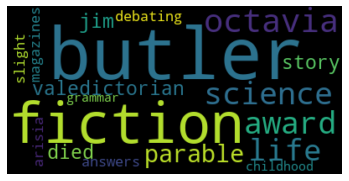

In [31]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

000                  0.230794
0062204707           0.183528
0252061400           0.187421
036                  0.209025
0385535922           0.225981
0393652673           0.209132
0431906335           0.200235
0814757925           0.221765
0822337454           0.192506
08854300600950269    0.224180
0903007010           0.201728
09574049608578256    0.197934
10                   0.229174
100                  0.204288
101                  0.206971
10436920701708044    0.218719
105                  0.179591
106                  0.218791
1080                 0.225529
11                   0.199994
Name: Topic 2, dtype: float64


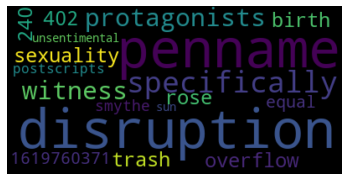

In [30]:
words = topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
words = topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)
words 

butler        0.289018
page          0.285791
links         0.285770
lost          0.281942
midnight      0.279050
damaged       0.278095
largely       0.276414
states        0.273385
alongside     0.269077
hallmark      0.268642
sensuous      0.267941
fledgling     0.264128
58            0.264099
los           0.263114
easy          0.261911
journals      0.261848
care          0.261702
columnists    0.261165
Name: Topic 9, dtype: float64

000                  0.230794
0062204707           0.183528
0252061400           0.187421
036                  0.209025
0385535922           0.225981
0393652673           0.209132
0431906335           0.200235
0814757925           0.221765
0822337454           0.192506
08854300600950269    0.224180
0903007010           0.201728
09574049608578256    0.197934
10                   0.229174
100                  0.204288
101                  0.206971
10436920701708044    0.218719
105                  0.179591
106                  0.218791
1080                 0.225529
11                   0.199994
Name: Topic 2, dtype: float64


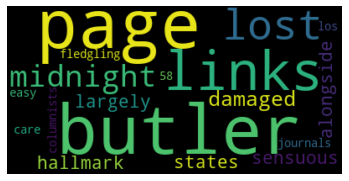

In [36]:


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stage Three: Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare

(Karsdorp, Kestemont, and Riddell).

In [37]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

entries/Annalee_Newitz.txt
compound: 0.4215, neg: 0.0, neu: 0.964, pos: 0.036,  
entries/Charlie_Jane_Anders.txt
compound: 0.9601, neg: 0.022, neu: 0.762, pos: 0.216,  
entries/N.K._Jemisin.txt
compound: 0.8271, neg: 0.083, neu: 0.752, pos: 0.165,  
entries/Octavia_Butler.txt
compound: -0.3384, neg: 0.068, neu: 0.894, pos: 0.038,  
entries/Terry_Pratchett.txt
compound: 0.9062, neg: 0.0, neu: 0.851, pos: 0.149,  


## Stage Four: Using the Markov chain code as a starter, generate a sentence using one of the documents

(Karsdorp, Kestemont, and Riddell).

In [39]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

In [40]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

Characters, place names, and titles in Pratchett's Discworld novels have led to dedicated conventions, the first computer was a key member of the 1990s.


## Stage Five: Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

(Karsdorp, Kestemont, and Riddell).

In [41]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

A June 2015 web server survey reported that approximately 84,000 websites had been diagnosed with early-onset Alzheimer's disease. In 1993, the family moved to Rowberrow, Somerset, in 1970. The documentary won a BAFTA award in the first three days. === Amateur astronomy === Pratchett sponsored a biennial award for unpublished science fiction and attended science fiction conventions from about 1963–1964, but stopped a few years before, which doctors believed had damaged the right side of his writing was the UK's best-selling author of the Screen. Pratchett was misdiagnosed as having had a purpose in human evolution. The Magic of Terry Pratchett Memorial Scholarship === In August 2007, Pratchett was the use of small capitals is a parody of Leonardo da Vinci. === Fanbase === Pratchett's first novel, entitled The Long Earth was released in 2017. === Alzheimer's disease === In August 2007, Pratchett announced that Sir Terry would be the recipient of the Keyboard. 

Characters, place names, 

## Bonus Stage: Try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

(Karsdorp, Kestemont, and Riddell).

